In [31]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#pd设置打印宽度，为了不换行显示
pd.set_option('display.width', 1000)

In [32]:

# 合成bar,按照bar的条数合并，也可以根据自己的需求改，比如根据交易额形成dollarbar，交易量形成volumebar
def merge_bar(data:pd.DataFrame,merge_num:int):
    merge_data = []
    start_index = 0
    count_num = 0
    for i in range(len(data)):
        count_num += 1
        if count_num >=merge_num:
            bar_data = {
                'datetime': data.iloc[start_index]['datetime'],
                'open': data.iloc[start_index]['open'],
                'close': data.iloc[i]['close'],
                'high': data.iloc[start_index:i + 1]['high'].max(),
                'low': data.iloc[start_index:i + 1]['low'].min(),
                'volume': data.iloc[start_index:i + 1]['amount'].sum(),
                'buy_amount': data.iloc[start_index:i + 1]['buy_amount'].sum(),
                'amount': data.iloc[start_index:i + 1]['buy_amount'].sum(),
                'count': i - start_index + 1
            }
            merge_data.append(bar_data)
            start_index = i + 1
            count_num = 0
    #
    return pd.DataFrame(merge_data)

def resample_bar(data:pd.DataFrame,rule='1h'):
    res_data = data.set_index('datetime')
    df = pd.DataFrame()
    df['open'] = res_data['open'].resample(rule).first()
    df['high'] = res_data['high'].resample(rule).max()
    df['low'] = res_data['low'].resample(rule).min()
    df['close'] = res_data['close'].resample(rule).last()
    df['volume'] = res_data['volume'].resample(rule).sum()
    df['amount'] = res_data['amount'].resample(rule).sum()
    df['buy_amount'] = res_data['buy_amount'].resample(rule).sum()
    df['amount'] = res_data['amount'].resample(rule).sum()
    return df



def load_data(s=''):
    df = pd.read_csv(s, parse_dates=['datetime'])
    # df = merge_bar(df,60)
    df = resample_bar(df)
    return df

df = load_data('../20241020/BTCUSDT.csv')
print(df)


                         open      high       low     close      volume        amount  buy_amount
datetime                                                                                         
2023-01-01 00:00:00  16590.10  16613.30  16581.24  16600.39  4269.58976  7.086554e+07  2168.50791
2023-01-01 01:00:00  16600.93  16604.37  16571.01  16582.08  4844.04845  8.034105e+07  2369.67401
2023-01-01 02:00:00  16581.45  16589.36  16571.80  16577.79  3340.80330  5.539010e+07  1635.23926
2023-01-01 03:00:00  16577.78  16590.06  16565.10  16570.14  4044.43359  6.704605e+07  2067.92157
2023-01-01 04:00:00  16570.14  16574.97  16564.09  16568.60  2622.14355  4.344849e+07  1311.38111
...                       ...       ...       ...       ...         ...           ...         ...
2024-10-01 12:00:00  63723.47  63879.81  63652.06  63868.94   778.75286  4.967721e+07   452.48517
2024-10-01 13:00:00  63868.93  63899.99  63674.49  63749.99   816.29206  5.205920e+07   525.04787
2024-10-01 14:00:00 

In [33]:
# seaborn 和 matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6)) #设置 宽 高
res_df = df.copy()

<Figure size 1000x600 with 0 Axes>

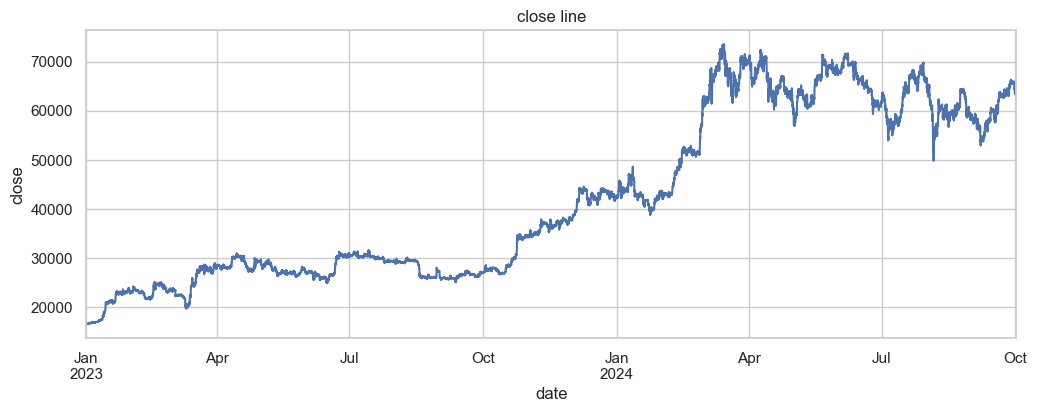

In [34]:
# 折线图 plot.line
line = res_df['close'].plot.line()
line.set_title('close line')
line.set_xlabel('date')
line.set_ylabel('close')
plt.show()

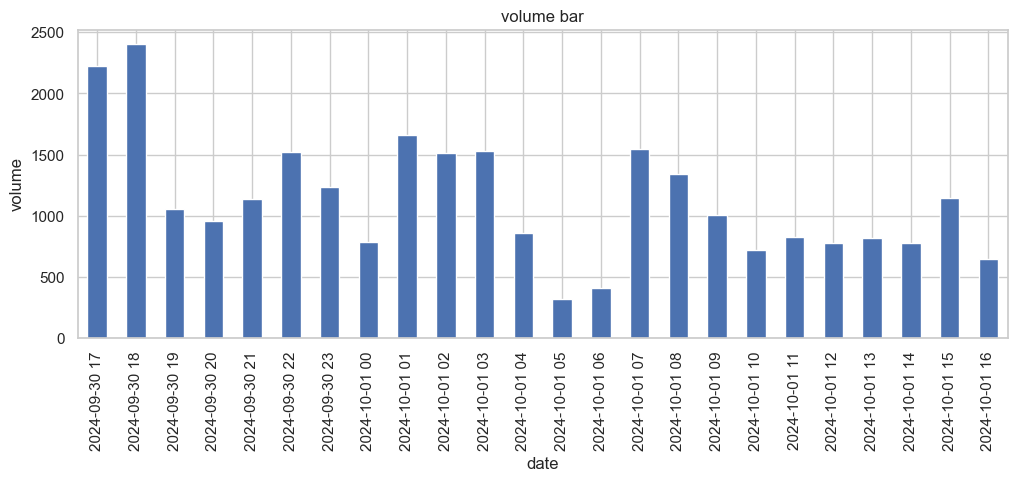

In [35]:
# 柱状图 plot.bar
df1 = res_df[-24:]
df1.index = df1.index.strftime('%Y-%m-%d %H')
bar = df1['volume'].plot.bar()
bar.set_title('volume bar')
bar.set_xlabel('date')
bar.set_ylabel('volume')
plt.show()

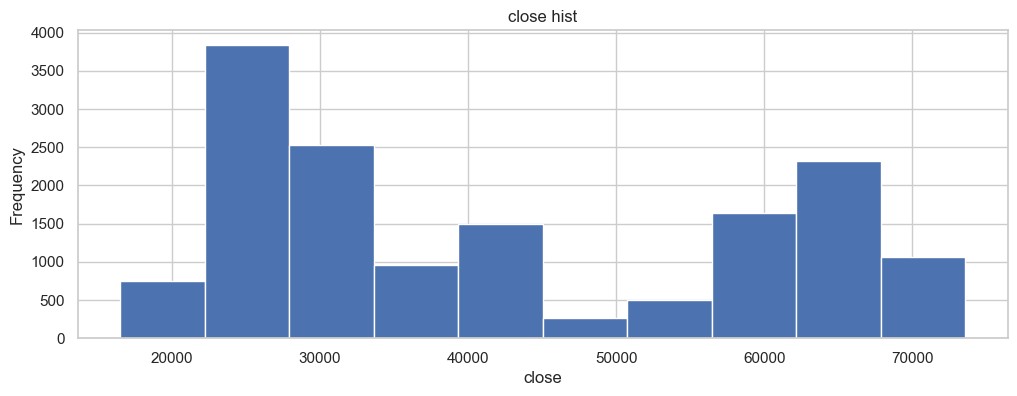

In [36]:
# 直方图 用于看分布 plot.hist
df1 = res_df[:]
bar = df1['close'].plot.hist()
bar.set_title('close hist')
bar.set_xlabel('close')
plt.show()

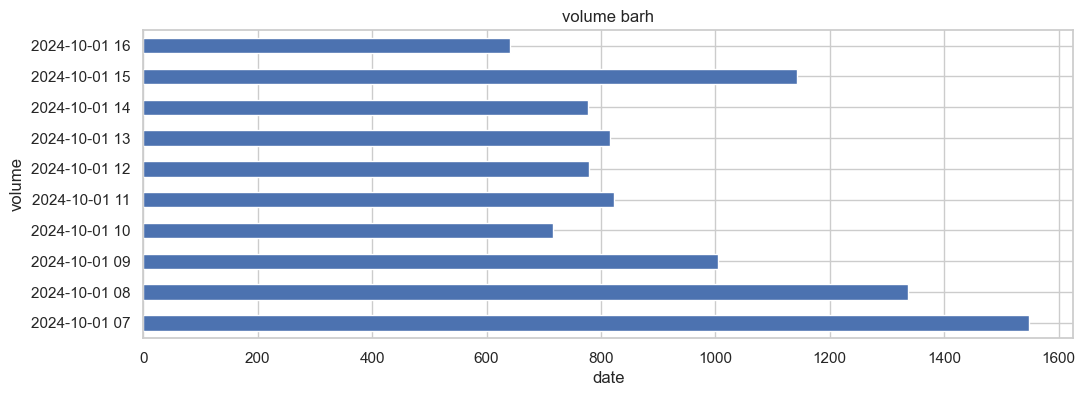

In [37]:
# 条线图 plot.barh
df1 = res_df[-10:]
df1.index = df1.index.strftime('%Y-%m-%d %H')
bar = df1['volume'].plot.barh()
bar.set_title('volume barh')
bar.set_xlabel('date')
bar.set_ylabel('volume')
plt.show()

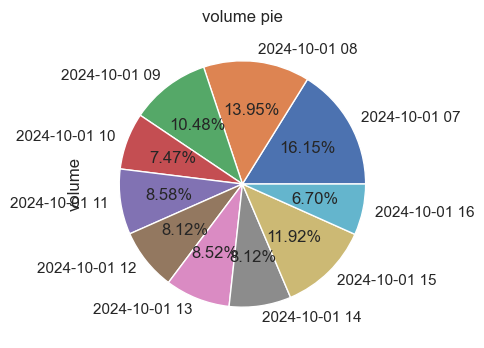

In [38]:
# 饼图 plot.pie
df1 = res_df[-10:]
df1.index = df1.index.strftime('%Y-%m-%d %H')
bar = df1['volume'].plot.pie(autopct='%1.2f%%')
bar.set_title('volume pie')
plt.show()

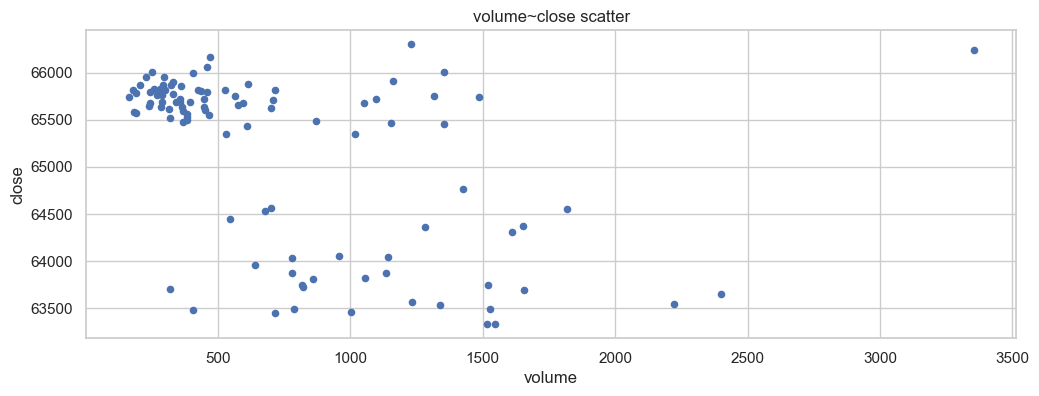

In [39]:
# 散点图 scatter
df1 = res_df[-100:]
df1.index = df1.index.strftime('%Y-%m-%d %H')
bar = df1.plot.scatter(x='volume',y='close')
bar.set_title('volume~close scatter')
plt.show()

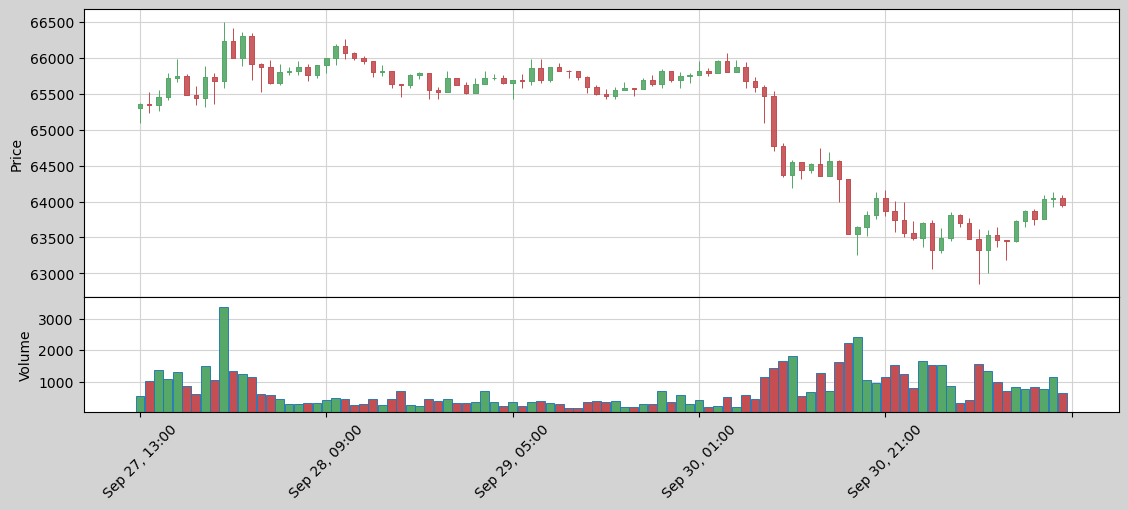

In [40]:
# K线图
import mplfinance as mpf
my_color = mpf.make_marketcolors(up='g',down='r',edge='inherit',wick='inherit',volume='inherit')
my_style = mpf.make_mpf_style(marketcolors=my_color,figcolor='lightgray',gridcolor='lightgray')
data = pd.DataFrame()
# print(df)
data['Open'] = df['open']
data['High'] = df['high']
data['Low'] = df['low']
data['Close'] = df['close']
data['Volume'] = df['volume']
data['Date'] = df.index
data.set_index('Date', inplace=True)
# print(data)
mpf.plot(data[-100:],type='candle',style=my_style,volume=True,figratio=(10,4))
plt.show()

<Axes: xlabel='datetime', ylabel='close'>

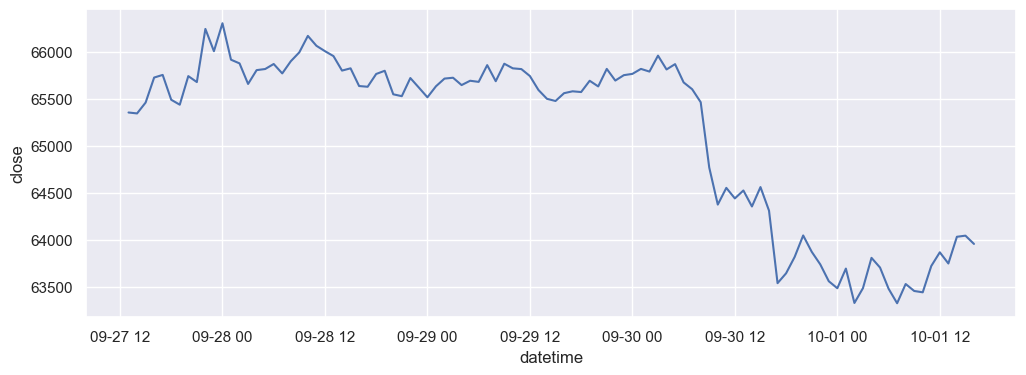

In [41]:
# seaborn 用法
import seaborn as sns
sns.set_theme(rc={"figure.figsize":(12, 4)}) # 设置主题

sns.lineplot(data=df[-100:]['close'])

<Axes: xlabel='datetime', ylabel='volume'>

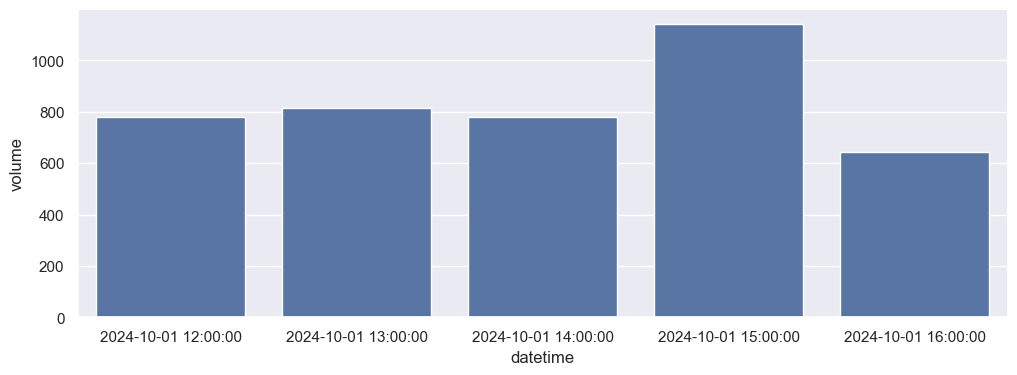

In [42]:
sns.barplot(data=df[-5:]['volume'])

<Axes: ylabel='count'>

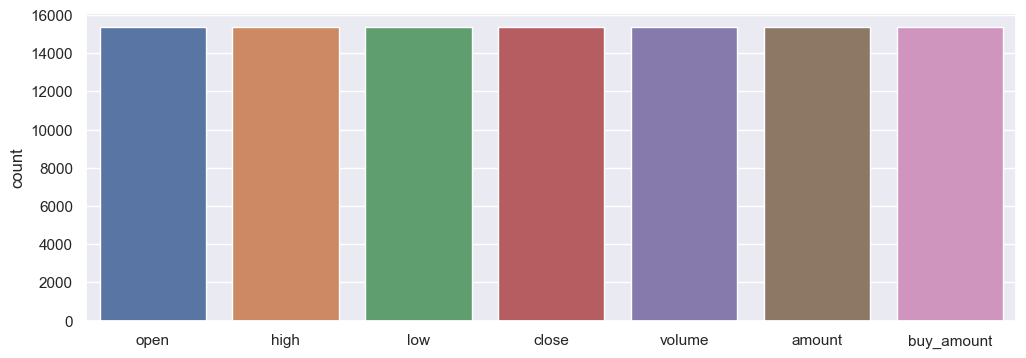

In [43]:
#
sns.countplot(data=df)

<Axes: >

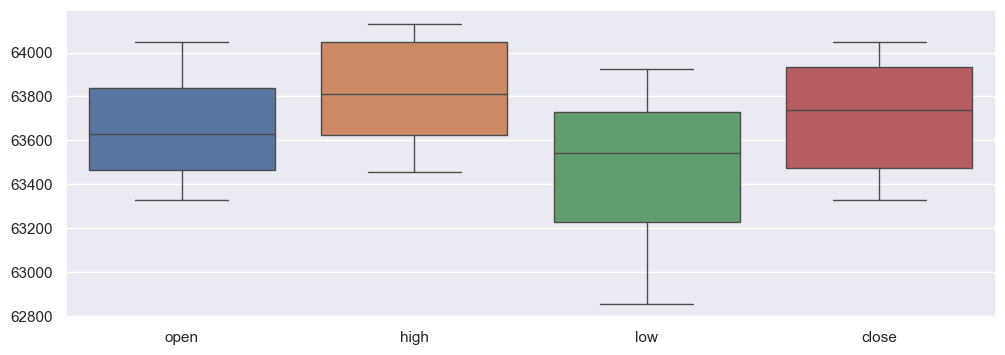

In [44]:
# 盒子图
sns.boxplot(data=df[-10:][['open','high','low','close']])

<Axes: >

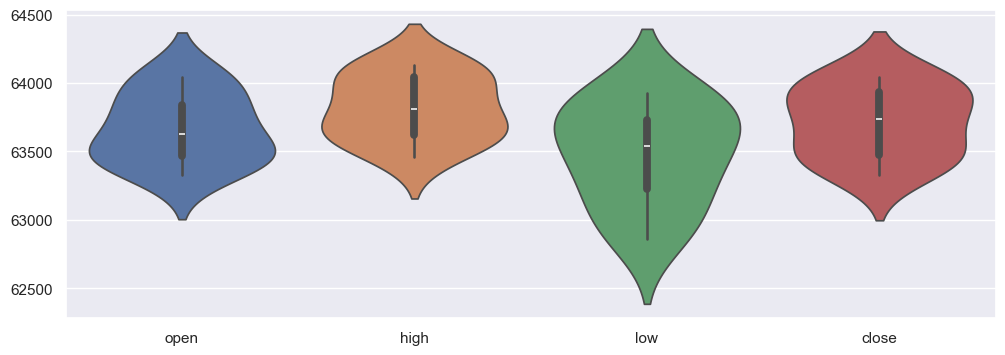

In [45]:
# 小提琴图
sns.violinplot(data=df[-10:][['open','high','low','close']])

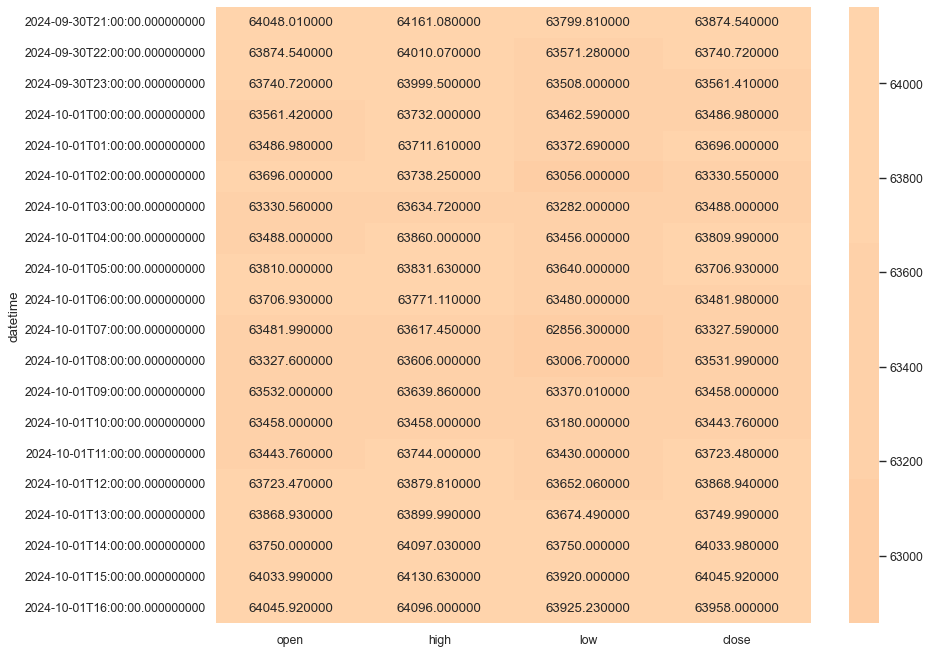

In [46]:
# 热力图
fig,ax = plt.subplots(figsize=(12,10),dpi=80)
sns.heatmap(df[-20:][['open','high','low','close']],center=0,annot=True,fmt='.6f',ax=ax)
plt.show()


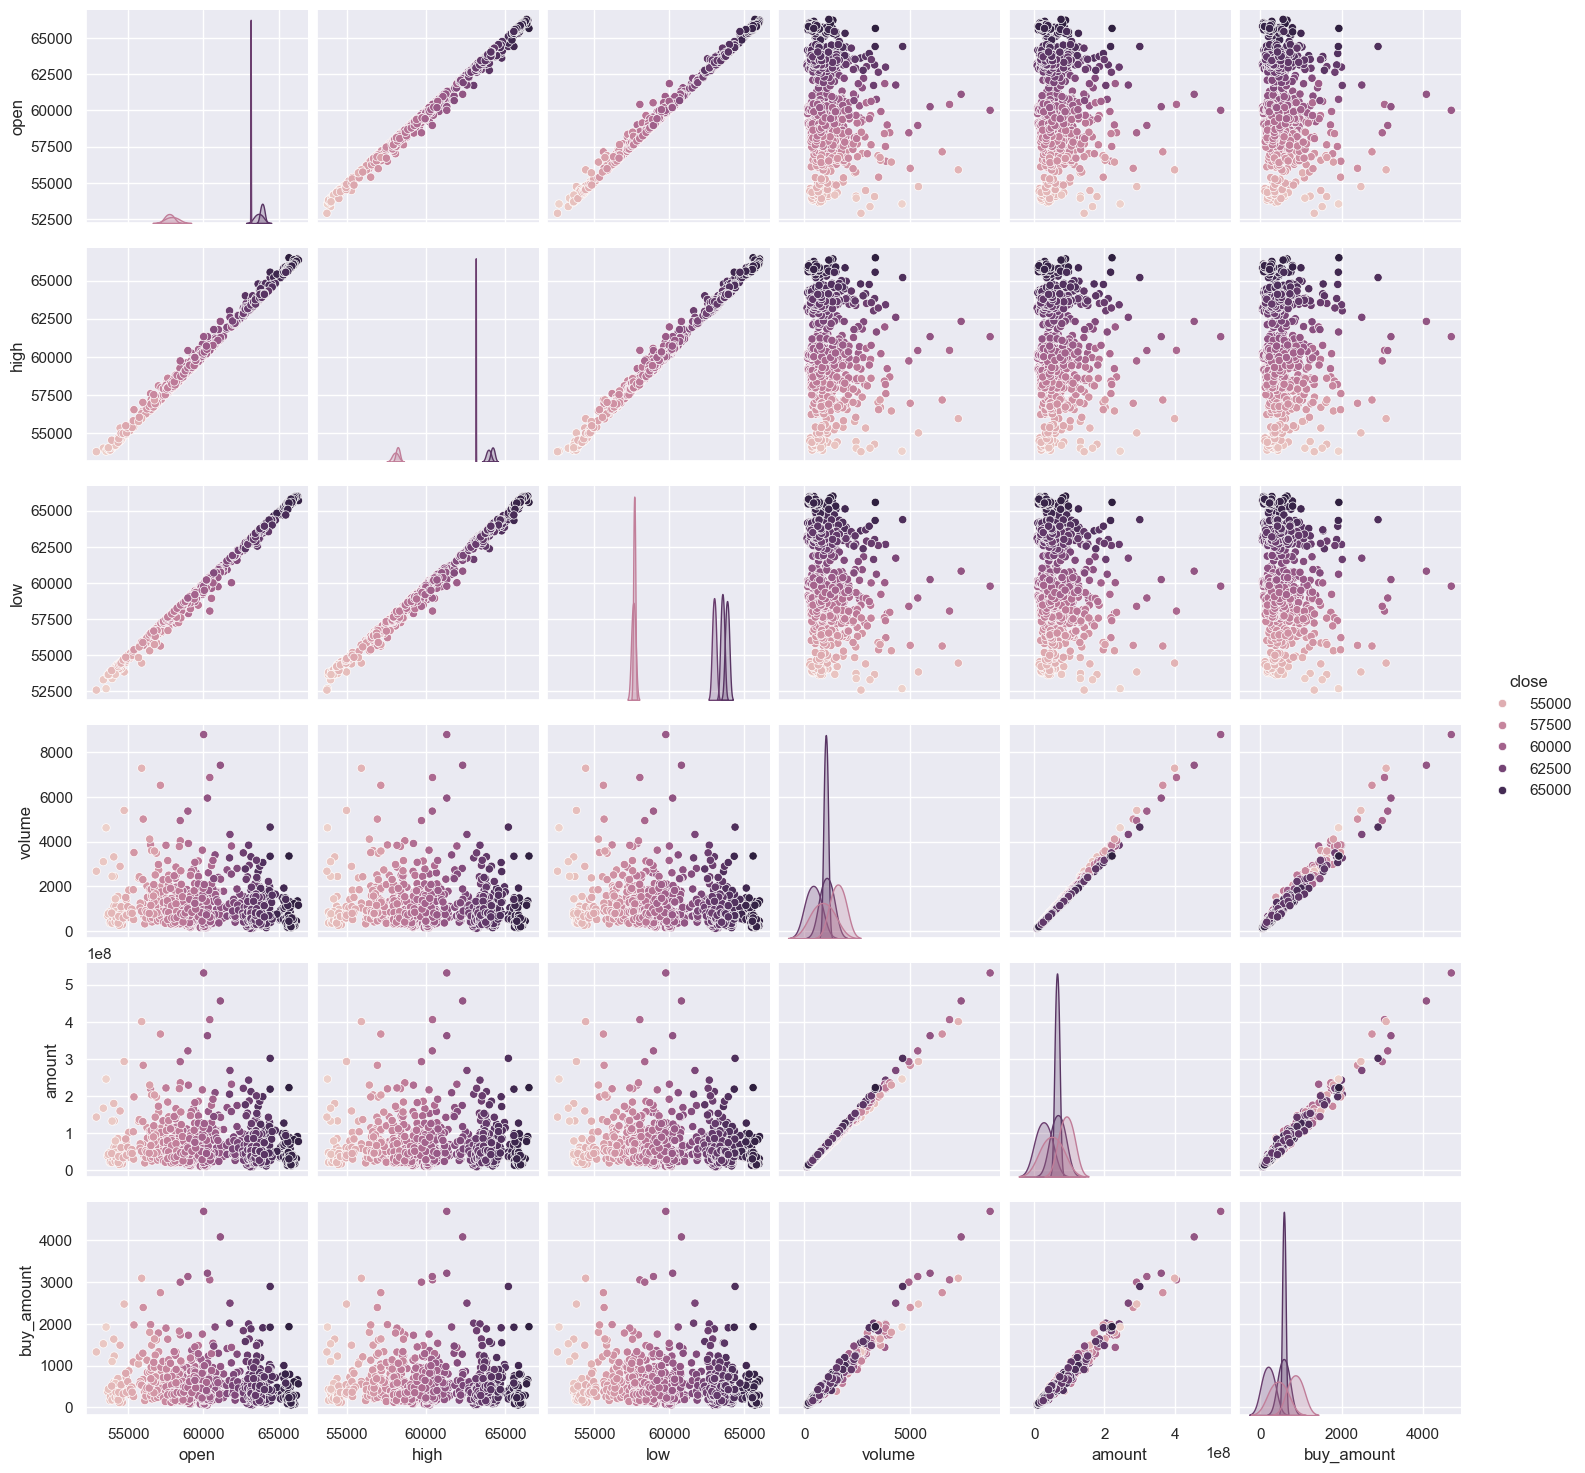

In [47]:
# 联合散点图pairplot
sns.pairplot(df[-1000:],hue='close')

In [48]:
# https://seaborn.pydata.org/examples/index.html 该页面有seaborn所有图示